In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sb
import ipywidgets as widgets
from IPython.display import Image
from IPython.core.display import HTML 

# Electromagnetic waves

In [2]:
%%HTML
<video width="768" height="572" controls>
  <source src="https://i.makeagif.com/media/10-29-2017/6n5RQA.mp4" type="video/mp4">
</video>

# The electromagnetic spectrum

In [3]:
#
# From a NASA page introducing the electromagnetic spectrum (https://science.nasa.gov/ems/01_intro)
#
Image(url= "https://smd-prod.s3.amazonaws.com/science-red/s3fs-public/thumbnails/image/EMS-Introduction.jpeg")

# The Planck function, Wien's law, the Stefan-Boltzman equation

In [4]:
def Planck_s(T, wl):
    '''returns the planck source function for the given temperature T (K) and wavenumber wl (microns)'''
    h   = 6.62607015e-34 # Planck constant
    c   = 299792458      # Speed of light 
    k_B = 1.380649e-23   # Boltzman constant
    l   = wl * 1e-6      # Input in microns, convert to m

    return (2 * h * c**2 / l**5) / (np.exp((h*c)/(l*k_B*T))-1)

Planck = np.vectorize(Planck_s)

In [5]:
# The names of the colors of the rainbow and their wavelengths in microns
#
rainbow = {"red"   :.65, 
           "orange":.60, 
           "yellow":.58, 
           "green" :.55, 
           "cyan"  :.50, 
           "blue"  :.45, 
           "violet":.40}

In [6]:
sb.set_context('talk')
@widgets.interact(T = [255, 288, 303, 5777], 
                  Show_Max=False, Show_Rainbow=False, 
                  lambda_max = [50, 4])
def plot_Planck(T, Show_Max, Show_Rainbow, lambda_max):
    wl = np.linspace(.1, lambda_max, num=1000)
    plt.plot(wl, Planck(T,wl),label='{}K'.format(T))
    
    if Show_Max: 
        b = 2897 # Wien's displacement law in m-K
        plt.axvline(b/T, label = "Max emission", color="red")
    if Show_Rainbow: 
        for c, w in rainbow.items(): plt.axvline(w, color=c)
    
    plt.ylabel('Planck function $B(\lambda, T)$')
    plt.xlabel('Wavelength (microns)')
    plt.legend(frameon=False)
    sb.despine(offset=10)

    plt.show()

interactive(children=(Dropdown(description='T', options=(255, 288, 303, 5777), value=255), Checkbox(value=Fals…

# Solar and terrestrial radiation

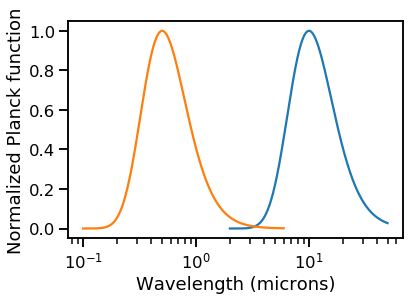

In [7]:
wl = np.linspace(.1, 50, num=1000)

# Terrestrial radiation - Temperature is 288K, look at 2-50 microns 
T  = 288
wl = np.linspace(2, 50, num=1000)
plt.plot(wl, Planck(288,wl)/np.max(Planck(288,wl)),label='{}K'.format(T))

# Solar radiation - Temperature is 5777K, look at 0.1-6 microns 
T = 5777
wl = np.linspace(.1,6, num=1000)
plt.plot(wl, Planck(5777,wl)/np.max(Planck(5777,wl)),label='{}K'.format(T))
plt.xscale('log')
plt.ylabel('Normalized Planck function')
plt.xlabel('Wavelength (microns)')
plt.show()


# The dependence of insolation on latitude and its implications

In [8]:
def to_rad(degs): 
    """ Converts degrees to radians """
    return(degs * np.pi/180.)

def lat_scaling(lats, declination=0): 
    """ Solar zenith angle at noon as a function of latitude and declination """
    return(np.maximum(0, np.cos(lats - declination)) )


sb.set_context("talk")

@widgets.interact(declination=(-23.5, 23.5), Show_Emission = False)
def plot_max_insolation(declination=0, Show_Emission = False): 
    S0    = 1361    # Solar constant, W/m^2
    sigma = 5.67e-8 # Stefan-Boltzman constant in W/(m^2 K^4)
    T     = 288     # Earth's average surface temperature 

    latitudes = to_rad(np.linspace(-90, 90, num=100))
    #
    # Plot noon-time insolation with x-axis proportional to area
    #   Solar constant is scaled by 1/2 to account for day length;
    #   this is only really right for 12 hour days e.g at sub-solar longitude  
    #
    plt.plot(np.sin(latitudes), 
             S0/2 * lat_scaling(latitudes, to_rad(declination)), 
             label = "max insolation")
    #
    # Label x-axis in degrees
    #
    plt.xticks([np.sin(to_rad(i)) for i in [60, 30, 0, -30, -60]], 
               labels = ["60N", "30N", "Eq", "30S", "60S"])
    plt.axvline(np.sin(to_rad(40.7)), label="New York", color="gray", linestyle="dashed")
    
    if Show_Emission: 
        plt.axhline(sigma * T**4, label = "emission", color="red")
    plt.legend(frameon=False)
    sb.despine(offset=10)
    plt.ylabel('Flux ($W/m^2$)')
    plt.xlabel('latitude (deg)')

    plt.show()


interactive(children=(FloatSlider(value=0.0, description='declination', max=23.5, min=-23.5), Checkbox(value=F…